<a href="https://colab.research.google.com/github/AmirrezaJalili/SnapfoodSentimentAnalyses/blob/main/Snapfood_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# !unzip "/content/drive/MyDrive/deep learning/nlp/Snapfood sentiment/Data/Zipped data/Snappfood - Sentiment Analysis.csv.zip" -d "/content/drive/MyDrive/deep learning/nlp/Snapfood sentiment/Data/Unzipped data"

In [31]:
!pip install langid
!pip install hazm
!pip install --force-reinstall numpy==1.25

  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


  Using cached numpy-1.25.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
hazm 0.9.4 requires numpy==1.24.3, but you have numpy 1.25.0 which is incompatible.


In [32]:
import numpy as np

np.__version__

'1.25.0'

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import langid
import re
from hazm import *
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing import text
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from sklearn.cluster import KMeans

In [34]:
df = pd.read_csv("/content/drive/MyDrive/deep learning/nlp/Snapfood sentiment/Data/Unzipped data/Snappfood - Sentiment Analysis.csv", on_bad_lines="skip")
df

,\tcomment\tlabel\tlabel_id
0,\tواقعا حیف وقت که بنویسم سرویس دهیتون شده افت...
1,\tقرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از ...
2,\tقیمت این مدل اصلا با کیفیتش سازگاری نداره، ف...
3,\tعالللی بود همه چه درست و به اندازه و کیفیت خ...
4,\tشیرینی وانیلی فقط یک مدل بود.\tHAPPY\t0
...,...
69754,\tسلام من به فاکتور غذاهایی که سفارش میدم احتی...
69755,\tسایز پیتزا نسبت به سفارشاتی که قبلا گذشتم کم...
69756,\tمن قارچ اضافه رو اضافه کرده بودم بودم اما اگ...
69757,\tهمرو بعد ۲ساعت تاخیر اشتباه آوردن پولشم رفت ...


In [35]:
df["comment"] = [df["\tcomment\tlabel\tlabel_id"][i].split("\t")[-3] for i in range(len(df))]
df["label"] = [df["\tcomment\tlabel\tlabel_id"][i].split("\t")[-2] for i in range(len(df))]
df["label_id"] = [df["\tcomment\tlabel\tlabel_id"][i].split("\t")[-1] for i in range(len(df))]
df.drop(["\tcomment\tlabel\tlabel_id"], axis=1, inplace=True)
df

,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0
...,...,...,...
69754,سلام من به فاکتور غذاهایی که سفارش میدم احتیاج...,SAD,1
69755,سایز پیتزا نسبت به سفارشاتی که قبلا گذشتم کم ش...,SAD,1
69756,من قارچ اضافه رو اضافه کرده بودم بودم اما اگر ...,HAPPY,0
69757,همرو بعد ۲ساعت تاخیر اشتباه آوردن پولشم رفت رو...,SAD,1


In [36]:
df.describe(include="all")

,comment,label,label_id
count,69759,69759,69759
unique,69759,2,2
top,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,HAPPY,0
freq,1,34881,34881


In [37]:
df.isna().sum()

comment     0
label       0
label_id    0
dtype: int64

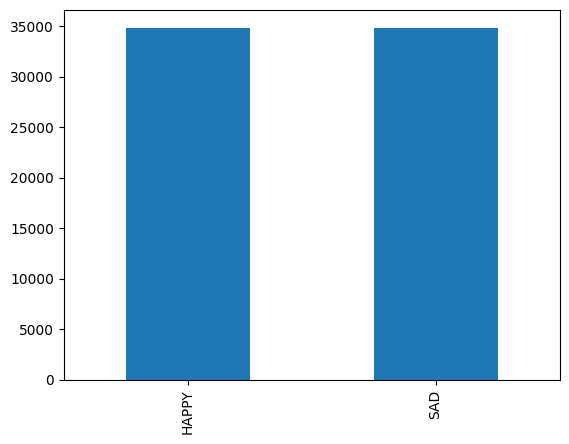

In [38]:
df["label"].value_counts().plot(kind="bar");

In [39]:
sentences_with_other_languages = []
for i in range(len(df["comment"])):
    language = langid.classify(df["comment"][i])[0]
    if language not in ["ur", "fa", "ar"]:
        print(df["comment"][i], end="\t")
        print(langid.classify(df["comment"][i]), end="\t")
        print(i)
        sentences_with_other_languages.append(i)
df.drop(sentences_with_other_languages, inplace=True)
print(len(sentences_with_other_languages), "sentences have been dropped.")
df

Kheili khub bud mersi vaghan	('en', -74.12143898010254)	13
The nutella and caramel rolls are AMAZING!!! GREAT service and very delicious desserts- عالى!!!!	('en', -304.2452754974365)	68
Shirmoz por az shekar boood engar shiro shekar mikhore adam	('eu', -160.228187084198)	473
vaghean ham kheyli tamiz baste bandi shode bod ham kheyli khoshmaze bod merC	('id', -143.11074829101562)	505
kheili khob bod tame naget bi nazir bod sib zamini ba sos vaqean harf nadasht merciiu	('zu', -183.78990828990936)	949
Mesle hamishe ba keyfiat va taze	('en', -31.97268581390381)	982
Ghaza taghriban zud be dastam resid tamesh khub bud dar kol ok bud-	('rw', -232.6851143836975)	1096
hamechi khub bod mamnoon	('zu', -26.32271444797516)	1326
Eclair behtarin o khoshmaze tarin shirinihae tehrano dare kolan	('tl', -161.8908965587616)	1344
Cake shokolati kamelan shekaste bood va khoord shode bood!!	('hr', -52.23912239074707)	1574
Be sheddat be sheddat lezzat bordam az ghaza hamechi khob bod	('mt', -176.69693183898926

,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0
...,...,...,...
69754,سلام من به فاکتور غذاهایی که سفارش میدم احتیاج...,SAD,1
69755,سایز پیتزا نسبت به سفارشاتی که قبلا گذشتم کم ش...,SAD,1
69756,من قارچ اضافه رو اضافه کرده بودم بودم اما اگر ...,HAPPY,0
69757,همرو بعد ۲ساعت تاخیر اشتباه آوردن پولشم رفت رو...,SAD,1


In [40]:
#normalize the text
normalizer = Normalizer()

def normal(text):
    text=str(text)
    # text = normalizer.character_refinement(text)
    # text = normalizer.punctuation_spacing(text)
    # text = normalizer.affix_spacing(text)
    text = normalizer.normalize(text)
    return text

#find stopwords in stopwords file
stopwords = []
file = open('/content/drive/MyDrive/deep learning/nlp/Stopwords/stopsword.txt').read()
[stopwords.append(x) for x in file.split('\n')]
stopwords = set(stopwords)
len(stopwords)

def remove_stopwords(text):
    text=str(text)
    filtered_tokens = [token for token in text.split() if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u200c"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r' ', text)

def remove_halfspace(text):
    emoji_pattern = re.compile("["
                u"\u200c"
    "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r' ', text)

def remove_link(text):
    return re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', str(text))
    # return re.sub(r"\bhttps?://\S+", "", str(text))

def remove_picUrl(text):
    return re.sub(r'pic.twitter.com/[\w]*',"", str(text))

def remove_rt(text):
    z = lambda text: re.compile('\#').sub('', re.compile('RT @').sub('@', str(text), count=1).strip())
    return z(text)

def remove_hashtag(text):
    return re.sub(r"#[^\s]+", '', str(text))

def remove_mention(text):
    return re.sub(r"@[^\s]+", '', str(text))

def remove_email(text):
    return re.sub(r'\S+@\S+', '', str(text))

def remove_numbers(text):
    return re.sub(r'^\d+\s|\s\d+\s|\s\d+$', ' ', str(text))

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', str(text))

def remove_quote(text):
    return  str(text).replace("'","")

def remove_chars(text):
    # return re.sub(r'\.(?!\d)', '', str(text))
    return  re.sub(r'[$+&+;+]|[><!+،:’,\(\).+]|[-+]|[…]|[\[\]»«//]|[\\]|[#+]|[_+]|[—+]|[*+]|[؟+]|[?+]|[""]', ' ', str(text))

def remove_englishword(text):
    return re.sub(r'[A-Za-z]+', '', str(text))

def remove_extraspaces(text):
    return re.sub(r' +', ' ', text)

def remove_extranewlines(text):
    return re.sub(r'\n\n+', '\n\n', text)

#lemmatize the text
lemmatizer = Lemmatizer()

def lemma(text):
    text=str(text)
    return lemmatizer.lemmatize(text)

def preprocess(text):
    text = remove_link(text)
    text = remove_picUrl(text)
    text = remove_englishword(text)
    text = normal(text)
    text = remove_stopwords(text)
    text = remove_emoji(text)
    text = remove_rt(text)
    text = remove_mention(text)
    text = remove_emoji(text)
    text = remove_hashtag(text)
    text = remove_email(text)
    text = remove_html(text)
    text = remove_chars(text)
    text = remove_numbers(text)
    text = remove_quote(text)
    text = lemma(text)
    text = remove_extraspaces(text)
    text = remove_extranewlines(text)
    text = remove_halfspace(text)
    text = remove_stopwords(text)
    return text

In [41]:
for i in range(5):
    print(df["comment"][i])
    print(preprocess(df["comment"][i]), "\n")

واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح
حیف وقت بنویسم سرویس دهیتون افتضاح 

قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از موقع رسید، شما ببین چقدرررررررررررر پلاک خفنههههه، من سالهاست مشتریشونم و سالهاست مزه بهشت میده غذاشون
قرار ساعته برسه نیم ساعت زودتر موقع ببین پلاک خفنهه سالهاست مشتریشونم سالهاست مزه بهشت میده غذاشون 

قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط ظاهر فریبنده داره، پرش میکنن کالباس و قارچ
قیمت مدل کیفیتش سازگاری نداره ظاهر فریبنده داره پرش میکنن کالباس قارچ 

عالللی بود همه چه درست و به اندازه و کیفیت خوب، امیداورم همیشه کیفیتتون خوب باشه ما مشتری همیشگی بشیم
عالی درست اندازه کیفیت امیداورم کیفیتتون باشه مشتری همیشگی بشیم 

شیرینی وانیلی فقط یک مدل بود.
شیرینی وانیلی مدل 



In [42]:
df["comment"] = df["comment"].apply(preprocess)
df

,comment,label,label_id
0,حیف وقت بنویسم سرویس دهیتون افتضاح,SAD,1
1,قرار ساعته برسه نیم ساعت زودتر موقع ببین پلاک ...,HAPPY,0
2,قیمت مدل کیفیتش سازگاری نداره ظاهر فریبنده دار...,SAD,1
3,عالی درست اندازه کیفیت امیداورم کیفیتتون باشه ...,HAPPY,0
4,شیرینی وانیلی مدل,HAPPY,0
...,...,...,...
69754,سلام فاکتور غذاهایی سفارش میدم احتیاج موضوع قس...,SAD,1
69755,سایز پیتزا نسبت سفارشاتی گذشتم,SAD,1
69756,قارچ اضافه اضافه اضافه نمیدونم دیگه پیتزا قارچ...,HAPPY,0
69757,همرو ساعت تاخیر اشتباه آوردن پولشم هوا,SAD,1


In [43]:
X = df["comment"]
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  df["label_id"],
                                                  test_size=0.2,
                                                  random_state=42)
X_train, X_val

(<55607x25080 sparse matrix of type '<class 'numpy.float64'>'
 	with 490750 stored elements in Compressed Sparse Row format>,
 <13902x25080 sparse matrix of type '<class 'numpy.float64'>'
 	with 122287 stored elements in Compressed Sparse Row format>)

In [45]:
rfc = RandomForestClassifier(n_estimators=300,
                             max_depth=30,
                             random_state=42)
rfc.fit(X_train, y_train)
rfc.score(X_val, y_val)

0.8133362106171774

In [46]:
svm = svm.SVC(kernel="linear", gamma='auto', random_state=42)
svm.fit(X_train, y_train)
svm.score(X_val, y_val)

0.8210329449000144

In [47]:
lr = LogisticRegression(random_state=42);
lr.fit(X_train, y_train);
lr.score(X_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.824773413897281

In [48]:
x_train, x_valid, y_train, y_valid = train_test_split(df["comment"],
                                                  df["label_id"].apply(lambda y : int(y)),
                                                  random_state=42,
                                                  test_size=0.2)

In [49]:
MEAN_SEQ_LEN = sum([len(i.split()) for i in x_train])//len(x_train)
print(MEAN_SEQ_LEN)

9


In [50]:
MAX_LEN = 15
MAX_FEATURES = 2000

In [51]:
tokens = text.Tokenizer(num_words=MAX_FEATURES)
tokens.fit_on_texts(x_train)

In [52]:
x_train=tokens.texts_to_sequences(x_train)
x_valid=tokens.texts_to_sequences(x_valid)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=MAX_LEN, padding="post")
x_valid = tf.keras.preprocessing.sequence.pad_sequences(x_valid, maxlen=MAX_LEN, padding="post")

In [53]:
inputs = tf.keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(MAX_FEATURES, 128)(inputs)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         256000    
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 256)         263168    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0   

In [54]:
model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=["binary_accuracy"])

In [55]:
es_cb = EarlyStopping(monitor='val_binary_accuracy',
                      min_delta=0,
                      restore_best_weights=True,
                      patience=5,
                      verbose=0,
                      mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_binary_accuracy',
                              factor=0.2,
                              patience=3,
                              min_lr=0.001)

In [56]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(x_valid, y_valid),
                    callbacks = [es_cb, reduce_lr],
                    verbose=1)

Epoch 1/20
1738/1738 [==============================] - 45s 21ms/step - loss: 0.4325 - binary_accuracy: 0.8021 - val_loss: 0.3987 - val_binary_accuracy: 0.8125 - lr: 0.0010
Epoch 2/20
1738/1738 [==============================] - 24s 14ms/step - loss: 0.3926 - binary_accuracy: 0.8233 - val_loss: 0.3912 - val_binary_accuracy: 0.8210 - lr: 0.0010
Epoch 3/20
1738/1738 [==============================] - 25s 15ms/step - loss: 0.3766 - binary_accuracy: 0.8317 - val_loss: 0.3968 - val_binary_accuracy: 0.8141 - lr: 0.0010
Epoch 4/20
1738/1738 [==============================] - 23s 14ms/step - loss: 0.3619 - binary_accuracy: 0.8373 - val_loss: 0.4058 - val_binary_accuracy: 0.8192 - lr: 0.0010
Epoch 5/20
1738/1738 [==============================] - 24s 14ms/step - loss: 0.3460 - binary_accuracy: 0.8448 - val_loss: 0.4133 - val_binary_accuracy: 0.8096 - lr: 0.0010
Epoch 6/20
1738/1738 [==============================] - 25s 14ms/step - loss: 0.3281 - binary_accuracy: 0.8535 - val_loss: 0.4199 - val

In [57]:
# from re import split
# text_vectorizer = TextVectorization(max_tokens=10000,
#                                     split="whitespace",
#                                     output_mode="int",
#                                     output_sequence_length=15)
# text_vectorizer.adapt(x_train)


# embedding = layers.Embedding(input_dim=10000,
#                                       output_dim=64,
#                                       input_length=15,
#                                       name="embedding_1")
# embedding


# inputs = layers.Input(shape=(1,), dtype="string")
# x = text_vectorizer(inputs)
# x = embedding(x)
# x = layers.LSTM(64, return_sequences=True)(x)
# x = layers.LSTM(64)(x)
# x = layers.Dense(32, activation="relu")(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(1, activation="sigmoid")(x)
# model = tf.keras.Model(inputs, outputs, name="model")
# model.summary()


# model.compile(loss="binary_crossentropy",
#               metrics="binary_accuracy",
#               optimizer="Adam")


# history = model.fit(x_train, y_train,
#                     batch_size=32,
#                     epochs=20,
#                     validation_data=(x_valid, y_valid),
#                     callbacks = [es_cb,reduce_lr],
#                     verbose=1)